# ECE C247 W2020 Project Banseok Lee

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
#Train subject1 data and test for subject1
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_train_valid = np.load("person_train_valid.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_test = np.load("person_test.npy")

y_train_valid -= 769
y_test -= 769

#Train all data and test for subject 1
X_train_valid2 = X_train_valid
y_train_valid2 = y_train_valid
person_train_valid2 = person_train_valid
X_test2 = X_test
y_test2 = y_test
person_test2 = person_test

#Train all data and test for all data
X_train_valid3 = X_train_valid
y_train_valid3 = y_train_valid
person_train_valid3 = person_train_valid
X_test3 = X_test
y_test3 = y_test
person_test3 = person_test

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Ptest = np.count_nonzero(person_test == 0)
Ptrainval = np.count_nonzero(person_train_valid == 0)
print('Subject1:',Ptrainval,Ptest)
X_train_valid = X_train_valid[0:Ptrainval]
y_train_valid = y_train_valid[0:Ptrainval]
X_test = X_test[0:Ptest]
y_test = y_test[0:Ptest]

Ptest = np.count_nonzero(person_test == 0)
Ptrainval = np.count_nonzero(person_train_valid == 0)
X_test2 = X_test2[0:Ptest]
y_test2 = y_test2[0:Ptest]

perm = np.random.permutation(X_train_valid.shape[0])
numTrain = int(0.8*X_train_valid.shape[0])
numVal = X_train_valid.shape[0] - numTrain
Xtrain = X_train_valid[perm[0:numTrain]]
ytrain = y_train_valid[perm[0:numTrain]]
Xval = X_train_valid[perm[numTrain: ]]
yval = y_train_valid[perm[numTrain: ]]

perm2 = np.random.permutation(X_train_valid2.shape[0])
numTrain2 = int(0.8*X_train_valid2.shape[0])
numVal2 = X_train_valid2.shape[0] - numTrain2
Xtrain2 = X_train_valid2[perm2[0:numTrain2]]
ytrain2 = y_train_valid2[perm2[0:numTrain2]]
Xval2 = X_train_valid2[perm2[numTrain2: ]]
yval2 = y_train_valid2[perm2[numTrain2: ]]

perm3 = np.random.permutation(X_train_valid3.shape[0])
numTrain3 = int(0.8*X_train_valid3.shape[0])
numVal3 = X_train_valid3.shape[0] - numTrain3
Xtrain3 = X_train_valid3[perm3[0:numTrain3]]
ytrain3 = y_train_valid3[perm3[0:numTrain3]]
Xval3 = X_train_valid3[perm3[numTrain3: ]]
yval3 = y_train_valid3[perm3[numTrain3: ]]

print(Xtrain.shape, ytrain.shape, Xval.shape, yval.shape, X_test.shape, y_test.shape)
print(Xtrain2.shape, ytrain2.shape, Xval2.shape, yval2.shape, X_test2.shape, y_test2.shape)
print(Xtrain3.shape, ytrain3.shape, Xval3.shape, yval3.shape, X_test3.shape, y_test3.shape)

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)
Subject1: 237 50
(189, 22, 1000) (189,) (48, 22, 1000) (48,) (50, 22, 1000) (50,)
(1692, 22, 1000) (1692,) (423, 22, 1000) (423,) (50, 22, 1000) (50,)
(1692, 22, 1000) (1692,) (423, 22, 1000) (423,) (443, 22, 1000) (443,)


# Vanilla RNN

In [3]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10420882068674730988
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4937233203
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14903357171966612101
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
from keras import layers, models, regularizers

Using TensorFlow backend.


In [5]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn = layers.SimpleRNN(10)(p1)
outputs = layers.Dense(4, activation='softmax')(rnn)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
permute_1 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 10)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________


In [6]:
loss_hist1 = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), epochs=50)

Train on 189 samples, validate on 48 samples
Epoch 1/50
189/189 [==============================] - 4s 20ms/step - loss: 1.4963 - acc: 0.3016 - val_loss: 1.6320 - val_acc: 0.1875
Epoch 2/50
189/189 [==============================] - 4s 19ms/step - loss: 1.4706 - acc: 0.3280 - val_loss: 1.6172 - val_acc: 0.1875
Epoch 3/50
189/189 [==============================] - 3s 18ms/step - loss: 1.4514 - acc: 0.3280 - val_loss: 1.6010 - val_acc: 0.1667
Epoch 4/50
189/189 [==============================] - 3s 18ms/step - loss: 1.4356 - acc: 0.3386 - val_loss: 1.5873 - val_acc: 0.1667
Epoch 5/50
189/189 [==============================] - 3s 18ms/step - loss: 1.4214 - acc: 0.3333 - val_loss: 1.5822 - val_acc: 0.1667
Epoch 6/50
189/189 [==============================] - 4s 19ms/step - loss: 1.4035 - acc: 0.3439 - val_loss: 1.5856 - val_acc: 0.1875
Epoch 7/50
189/189 [==============================] - 4s 19ms/step - loss: 1.3872 - acc: 0.3545 - val_loss: 1.5796 - val_acc: 0.1667
Epoch 8/50
189/189 [====

In [7]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)


# Evaluate on test data
50/50 [==============================] - 1s 11ms/step
test loss, test acc: [1.5564281129837036, 0.18000000715255737]

# Evaluate on test data
443/443 [==============================] - 4s 8ms/step
test loss, test acc: [1.5363573812738767, 0.2370203137397766]


In [8]:
hist1 = loss_hist1.history
hist_df1 = pd.DataFrame(loss_hist1.history)
hist_csv_file1 = 'loss_hist1.csv'
with open(hist_csv_file1, mode='w') as f:
    hist_df1.to_csv(f)

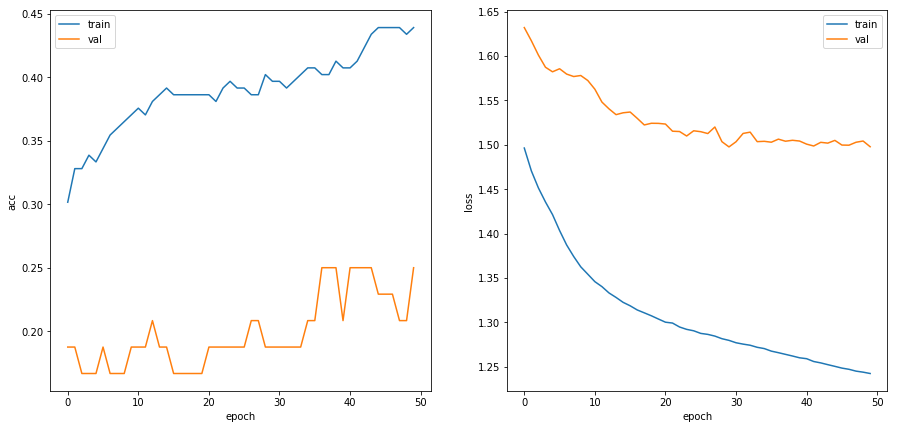

In [9]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist1['acc'])
plt.plot(hist1['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])


In [10]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn = layers.SimpleRNN(10)(p1)
outputs = layers.Dense(4, activation='softmax')(rnn)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
permute_2 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 10)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 374
Trainable params: 374
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss_hist2 = model.fit(Xtrain2, ytrain2, validation_data=(Xval2, yval2), epochs=50)

Train on 1692 samples, validate on 423 samples
Epoch 1/50
1692/1692 [==============================] - 30s 18ms/step - loss: 1.5955 - acc: 0.2577 - val_loss: 1.4857 - val_acc: 0.2719
Epoch 2/50
1692/1692 [==============================] - 30s 18ms/step - loss: 1.5122 - acc: 0.2630 - val_loss: 1.4508 - val_acc: 0.2624
Epoch 3/50
1692/1692 [==============================] - 30s 17ms/step - loss: 1.4711 - acc: 0.2642 - val_loss: 1.4322 - val_acc: 0.2671
Epoch 4/50
1692/1692 [==============================] - 30s 18ms/step - loss: 1.4460 - acc: 0.2683 - val_loss: 1.4238 - val_acc: 0.2837
Epoch 5/50
1692/1692 [==============================] - 30s 18ms/step - loss: 1.4286 - acc: 0.2796 - val_loss: 1.4194 - val_acc: 0.2742
Epoch 6/50
1692/1692 [==============================] - 30s 18ms/step - loss: 1.4140 - acc: 0.2807 - val_loss: 1.4158 - val_acc: 0.2719
Epoch 7/50
1692/1692 [==============================] - 30s 18ms/step - loss: 1.4053 - acc: 0.2843 - val_loss: 1.4133 - val_acc: 0.2695
E

In [12]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)


# Evaluate on test data
50/50 [==============================] - 1s 11ms/step
test loss, test acc: [1.4353515625, 0.20000000298023224]

# Evaluate on test data
443/443 [==============================] - 4s 8ms/step
test loss, test acc: [1.420357610517377, 0.20541760325431824]


In [13]:
hist2 = loss_hist2.history
hist_df2 = pd.DataFrame(loss_hist2.history)
hist_csv_file2 = 'loss_hist2.csv'
with open(hist_csv_file2, mode='w') as f:
    hist_df2.to_csv(f)

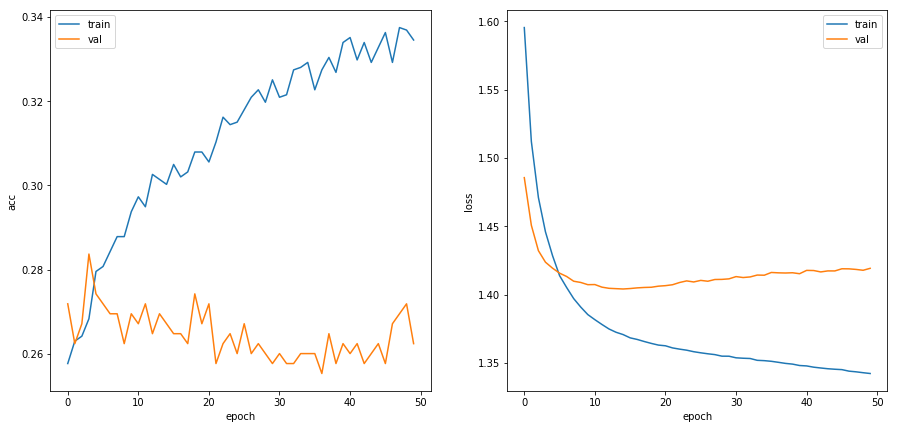

In [14]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist2['acc'])
plt.plot(hist2['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 1 Layer LSTM

In [15]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn = layers.LSTM(10)(p1)
outputs = layers.Dense(4, activation='softmax')(rnn)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
permute_3 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                1320      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 44        
Total params: 1,364
Trainable params: 1,364
Non-trainable params: 0
_________________________________________________________________


In [16]:
loss_hist3 = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), epochs=50)

Train on 189 samples, validate on 48 samples
Epoch 1/50
189/189 [==============================] - 5s 26ms/step - loss: 1.4352 - acc: 0.2963 - val_loss: 1.4566 - val_acc: 0.2708
Epoch 2/50
189/189 [==============================] - 5s 25ms/step - loss: 1.4054 - acc: 0.3016 - val_loss: 1.4451 - val_acc: 0.2500
Epoch 3/50
189/189 [==============================] - 5s 25ms/step - loss: 1.3842 - acc: 0.3122 - val_loss: 1.4404 - val_acc: 0.2500
Epoch 4/50
189/189 [==============================] - 5s 25ms/step - loss: 1.3664 - acc: 0.3439 - val_loss: 1.4391 - val_acc: 0.2917
Epoch 5/50
189/189 [==============================] - 5s 25ms/step - loss: 1.3522 - acc: 0.3439 - val_loss: 1.4456 - val_acc: 0.2917
Epoch 6/50
189/189 [==============================] - 5s 25ms/step - loss: 1.3344 - acc: 0.3862 - val_loss: 1.4508 - val_acc: 0.2708
Epoch 7/50
189/189 [==============================] - 5s 25ms/step - loss: 1.3212 - acc: 0.4127 - val_loss: 1.4530 - val_acc: 0.2708
Epoch 8/50
189/189 [====

In [17]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)


# Evaluate on test data
50/50 [==============================] - 1s 13ms/step
test loss, test acc: [1.6301756381988526, 0.23999999463558197]

# Evaluate on test data
443/443 [==============================] - 4s 10ms/step
test loss, test acc: [1.4904558938459134, 0.2505643367767334]


In [18]:
hist3 = loss_hist3.history
hist_df3 = pd.DataFrame(loss_hist3.history)
hist_csv_file3 = 'loss_hist3.csv'
with open(hist_csv_file3, mode='w') as f:
    hist_df3.to_csv(f)
    

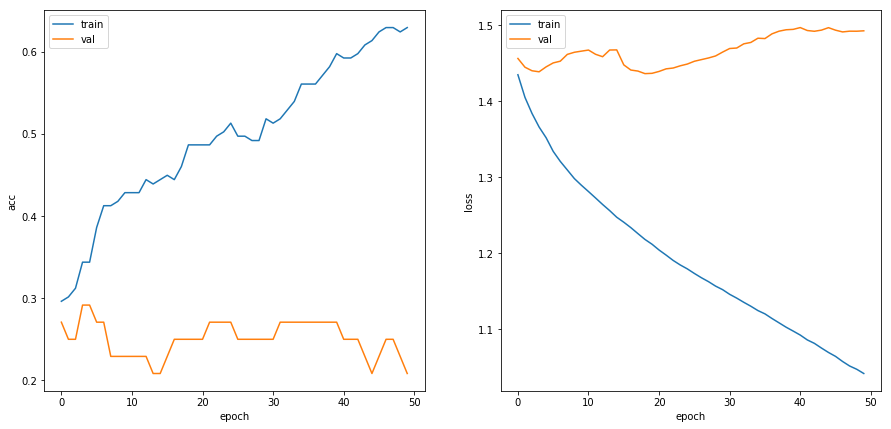

In [19]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist3['acc'])
plt.plot(hist3['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

In [20]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn = layers.LSTM(10)(p1)
outputs = layers.Dense(4, activation='softmax')(rnn)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
permute_4 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                1320      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 44        
Total params: 1,364
Trainable params: 1,364
Non-trainable params: 0
_________________________________________________________________


In [21]:
loss_hist4 = model.fit(Xtrain2, ytrain2, validation_data=(Xval2, yval2), epochs=50)

Train on 1692 samples, validate on 423 samples
Epoch 1/50
1692/1692 [==============================] - 41s 24ms/step - loss: 1.4541 - acc: 0.2405 - val_loss: 1.4286 - val_acc: 0.2411
Epoch 2/50
1692/1692 [==============================] - 40s 24ms/step - loss: 1.4120 - acc: 0.2600 - val_loss: 1.4201 - val_acc: 0.2482
Epoch 3/50
1692/1692 [==============================] - 41s 24ms/step - loss: 1.3949 - acc: 0.2754 - val_loss: 1.4163 - val_acc: 0.2388
Epoch 4/50
1692/1692 [==============================] - 41s 24ms/step - loss: 1.3823 - acc: 0.2813 - val_loss: 1.4156 - val_acc: 0.2459
Epoch 5/50
1692/1692 [==============================] - 41s 24ms/step - loss: 1.3752 - acc: 0.2837 - val_loss: 1.4174 - val_acc: 0.2506
Epoch 6/50
1692/1692 [==============================] - 40s 24ms/step - loss: 1.3693 - acc: 0.2985 - val_loss: 1.4171 - val_acc: 0.2388
Epoch 7/50
1692/1692 [==============================] - 41s 24ms/step - loss: 1.3641 - acc: 0.3121 - val_loss: 1.4154 - val_acc: 0.2270
E

In [22]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)


# Evaluate on test data
50/50 [==============================] - 1s 13ms/step
test loss, test acc: [1.462017960548401, 0.2199999988079071]

# Evaluate on test data
443/443 [==============================] - 4s 10ms/step
test loss, test acc: [1.4976087038995989, 0.22573363780975342]


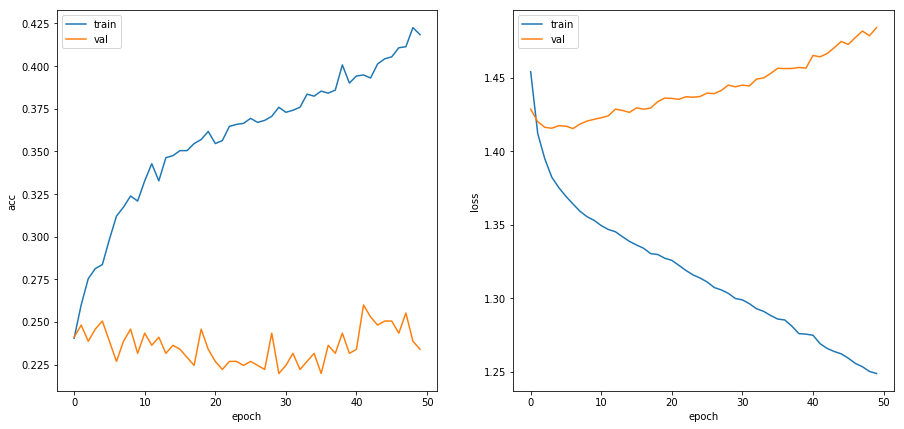

In [23]:

hist4 = loss_hist4.history
hist_df4 = pd.DataFrame(loss_hist4.history)
hist_csv_file4 = 'loss_hist4.csv'
with open(hist_csv_file4, mode='w') as f:
    hist_df4.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist4['acc'])
plt.plot(hist4['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist4['loss'])
plt.plot(hist4['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 1 Layer GRU

In [24]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn = layers.GRU(10)(p1)
outputs = layers.Dense(4, activation='softmax')(rnn)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
permute_5 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 10)                990       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 44        
Total params: 1,034
Trainable params: 1,034
Non-trainable params: 0
_________________________________________________________________


In [25]:
loss_hist5 = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), epochs=50)

Train on 189 samples, validate on 48 samples
Epoch 1/50
189/189 [==============================] - 6s 30ms/step - loss: 1.5864 - acc: 0.2540 - val_loss: 1.5958 - val_acc: 0.2500
Epoch 2/50
189/189 [==============================] - 5s 28ms/step - loss: 1.5231 - acc: 0.2804 - val_loss: 1.5771 - val_acc: 0.2292
Epoch 3/50
189/189 [==============================] - 5s 29ms/step - loss: 1.4821 - acc: 0.2910 - val_loss: 1.5663 - val_acc: 0.1875
Epoch 4/50
189/189 [==============================] - 5s 28ms/step - loss: 1.4448 - acc: 0.3069 - val_loss: 1.5577 - val_acc: 0.1875
Epoch 5/50
189/189 [==============================] - 5s 28ms/step - loss: 1.4185 - acc: 0.3280 - val_loss: 1.5527 - val_acc: 0.1667
Epoch 6/50
189/189 [==============================] - 5s 29ms/step - loss: 1.3969 - acc: 0.3228 - val_loss: 1.5466 - val_acc: 0.1667
Epoch 7/50
189/189 [==============================] - 5s 28ms/step - loss: 1.3781 - acc: 0.3439 - val_loss: 1.5442 - val_acc: 0.1667
Epoch 8/50
189/189 [====

In [26]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)


# Evaluate on test data
50/50 [==============================] - 1s 14ms/step
test loss, test acc: [1.5396103429794312, 0.23999999463558197]

# Evaluate on test data
443/443 [==============================] - 5s 11ms/step
test loss, test acc: [1.5529627062666227, 0.259593665599823]


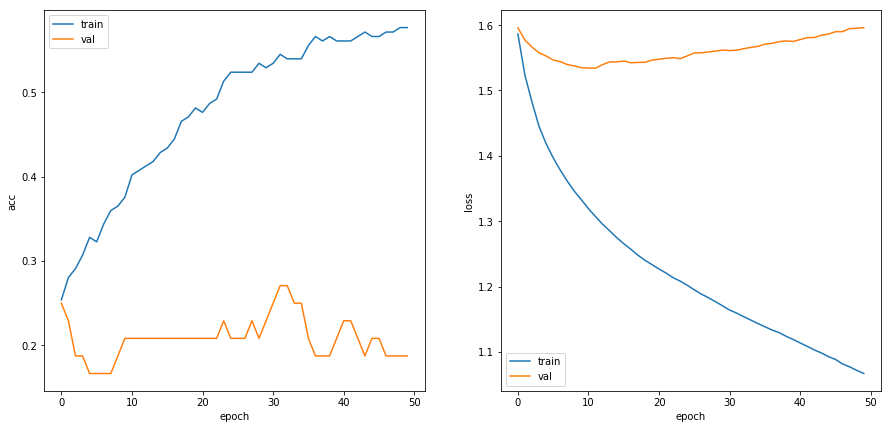

In [27]:
hist5 = loss_hist5.history
hist_df5 = pd.DataFrame(loss_hist5.history)
hist_csv_file5 = 'loss_hist5.csv'
with open(hist_csv_file5, mode='w') as f:
    hist_df5.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist5['acc'])
plt.plot(hist5['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist5['loss'])
plt.plot(hist5['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

In [28]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn = layers.GRU(10)(p1)
outputs = layers.Dense(4, activation='softmax')(rnn)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
permute_6 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 10)                990       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 44        
Total params: 1,034
Trainable params: 1,034
Non-trainable params: 0
_________________________________________________________________


In [29]:
loss_hist6 = model.fit(Xtrain2, ytrain2, validation_data=(Xval2, yval2), epochs=50)

Train on 1692 samples, validate on 423 samples
Epoch 1/50
1692/1692 [==============================] - 47s 28ms/step - loss: 1.5205 - acc: 0.2583 - val_loss: 1.5064 - val_acc: 0.2624
Epoch 2/50
1692/1692 [==============================] - 47s 28ms/step - loss: 1.4761 - acc: 0.2736 - val_loss: 1.4899 - val_acc: 0.2600
Epoch 3/50
1692/1692 [==============================] - 47s 28ms/step - loss: 1.4546 - acc: 0.2772 - val_loss: 1.4797 - val_acc: 0.2553
Epoch 4/50
1692/1692 [==============================] - 47s 28ms/step - loss: 1.4352 - acc: 0.2807 - val_loss: 1.4728 - val_acc: 0.2577
Epoch 5/50
1692/1692 [==============================] - 47s 28ms/step - loss: 1.4216 - acc: 0.2902 - val_loss: 1.4662 - val_acc: 0.2530
Epoch 6/50
1692/1692 [==============================] - 47s 28ms/step - loss: 1.4102 - acc: 0.2931 - val_loss: 1.4609 - val_acc: 0.2411
Epoch 7/50
1692/1692 [==============================] - 47s 28ms/step - loss: 1.3991 - acc: 0.2979 - val_loss: 1.4587 - val_acc: 0.2553
E

In [30]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)


# Evaluate on test data
50/50 [==============================] - 1s 14ms/step
test loss, test acc: [1.4811766242980957, 0.2199999988079071]

# Evaluate on test data
443/443 [==============================] - 5s 11ms/step
test loss, test acc: [1.491538904321382, 0.22799097001552582]


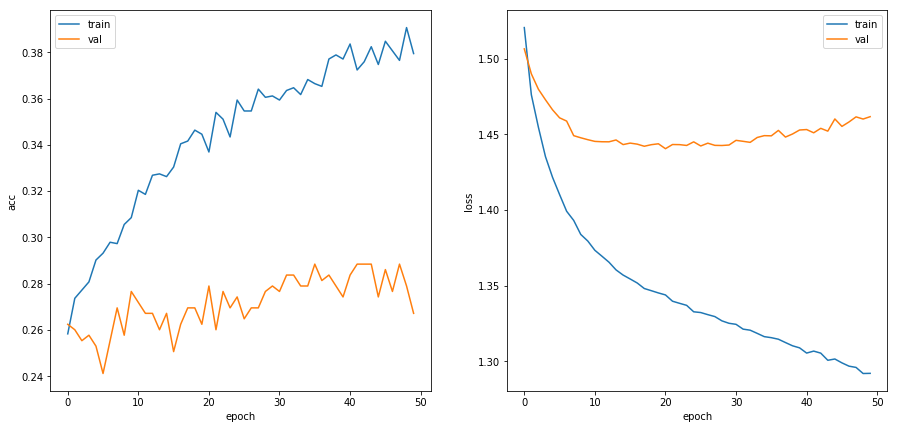

In [31]:
hist6 = loss_hist6.history
hist_df6 = pd.DataFrame(loss_hist6.history)
hist_csv_file6 = 'loss_hist6.csv'
with open(hist_csv_file6, mode='w') as f:
    hist_df6.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist6['acc'])
plt.plot(hist6['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist6['loss'])
plt.plot(hist6['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# GRU Optimization

# 1st - 2 Layer GRU

In [32]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn1 = layers.GRU(20, return_sequences=True)(p1)
rnn2 = layers.GRU(20)(rnn1)
outputs = layers.Dense(4, activation='softmax')(rnn2)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
permute_7 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
gru_3 (GRU)                  (None, 1000, 20)          2580      
_________________________________________________________________
gru_4 (GRU)                  (None, 20)                2460      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 84        
Total params: 5,124
Trainable params: 5,124
Non-trainable params: 0
_________________________________________________________________


In [33]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=10)

Train on 1692 samples, validate on 423 samples
Epoch 1/10
1692/1692 [==============================] - 98s 58ms/step - loss: 1.4565 - acc: 0.2589 - val_loss: 1.4110 - val_acc: 0.2719
Epoch 2/10
1692/1692 [==============================] - 98s 58ms/step - loss: 1.3909 - acc: 0.2896 - val_loss: 1.4042 - val_acc: 0.2695
Epoch 3/10
1692/1692 [==============================] - 97s 57ms/step - loss: 1.3734 - acc: 0.3268 - val_loss: 1.4076 - val_acc: 0.2435
Epoch 4/10
1692/1692 [==============================] - 97s 57ms/step - loss: 1.3589 - acc: 0.3357 - val_loss: 1.4116 - val_acc: 0.2506
Epoch 5/10
1692/1692 [==============================] - 97s 58ms/step - loss: 1.3478 - acc: 0.3499 - val_loss: 1.4178 - val_acc: 0.2364
Epoch 6/10
1692/1692 [==============================] - 98s 58ms/step - loss: 1.3390 - acc: 0.3599 - val_loss: 1.4197 - val_acc: 0.2411
Epoch 7/10
1692/1692 [==============================] - 97s 58ms/step - loss: 1.3272 - acc: 0.3783 - val_loss: 1.4228 - val_acc: 0.2340
E


# Evaluate on test data
443/443 [==============================] - 10s 22ms/step
test loss, test acc: [1.4474793597214917, 0.23024830222129822]


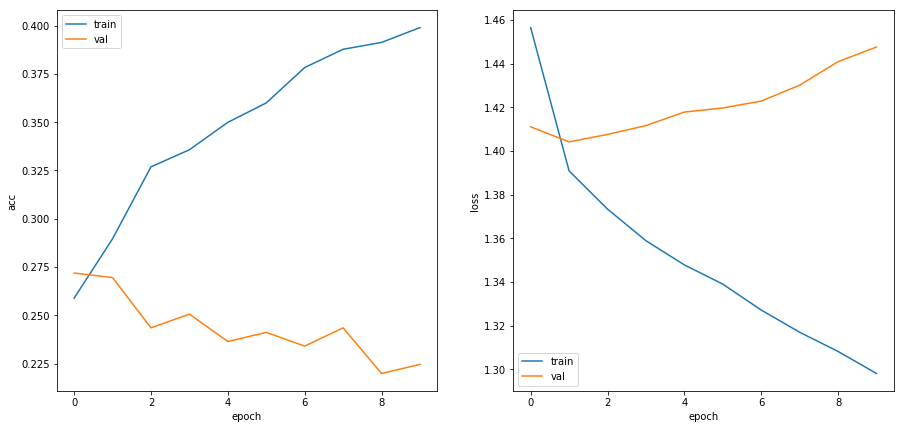

In [34]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)

hist = loss_hist.history
hist_df = pd.DataFrame(loss_hist.history)
hist_csv_file = 'loss_hist7.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 2nd - 2 Layer GRU w dropout

In [35]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn1 = layers.GRU(20, return_sequences=True, dropout=0.5)(p1)
rnn2 = layers.GRU(20)(rnn1)
outputs = layers.Dense(4, activation='softmax')(rnn2)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
permute_8 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
gru_5 (GRU)                  (None, 1000, 20)          2580      
_________________________________________________________________
gru_6 (GRU)                  (None, 20)                2460      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 84        
Total params: 5,124
Trainable params: 5,124
Non-trainable params: 0
_________________________________________________________________


In [36]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=10)

Train on 1692 samples, validate on 423 samples
Epoch 1/10
1692/1692 [==============================] - 98s 58ms/step - loss: 1.4553 - acc: 0.2665 - val_loss: 1.4206 - val_acc: 0.2364
Epoch 2/10
1692/1692 [==============================] - 97s 57ms/step - loss: 1.4190 - acc: 0.2465 - val_loss: 1.4181 - val_acc: 0.2128
Epoch 3/10
1692/1692 [==============================] - 97s 57ms/step - loss: 1.4070 - acc: 0.2583 - val_loss: 1.4024 - val_acc: 0.2364
Epoch 4/10
1692/1692 [==============================] - 97s 57ms/step - loss: 1.3920 - acc: 0.2595 - val_loss: 1.3997 - val_acc: 0.2553
Epoch 5/10
1692/1692 [==============================] - 97s 57ms/step - loss: 1.4044 - acc: 0.2512 - val_loss: 1.3949 - val_acc: 0.2719
Epoch 6/10
1692/1692 [==============================] - 97s 57ms/step - loss: 1.3907 - acc: 0.2736 - val_loss: 1.3986 - val_acc: 0.2600
Epoch 7/10
1692/1692 [==============================] - 97s 57ms/step - loss: 1.3937 - acc: 0.2660 - val_loss: 1.3957 - val_acc: 0.2553
E


# Evaluate on test data
443/443 [==============================] - 10s 22ms/step
test loss, test acc: [1.4109825654707966, 0.21444694697856903]


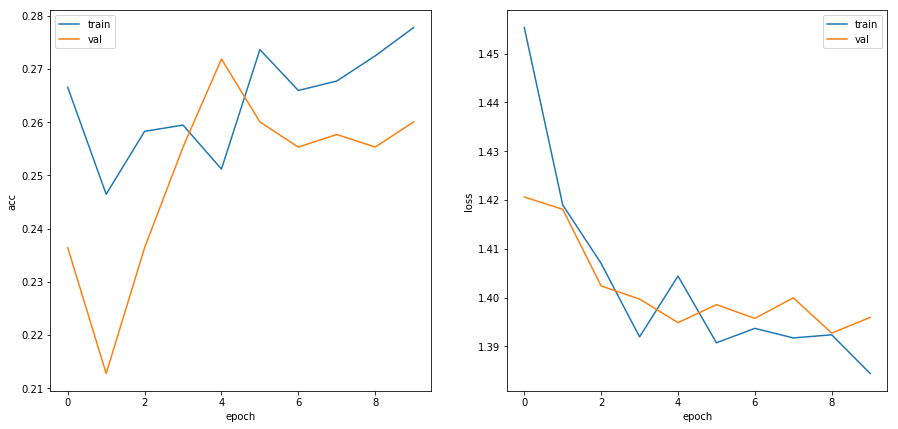

In [37]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)

hist = loss_hist.history
hist_df = pd.DataFrame(loss_hist.history)
hist_csv_file = 'loss_hist8.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 3rd - 2 GRU, 1F w dropout, bn

In [38]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn1 = layers.GRU(20, return_sequences=True)(p1)
rnn2 = layers.GRU(20, return_sequences=True)(rnn1)
flt = layers.Flatten()(rnn2)

ff = layers.Dense(100)(flt)
bn = layers.BatchNormalization()(ff)
ac = layers.ELU()(bn)
dr = layers.Dropout(0.5)(ac)

outputs = layers.Dense(4, activation='softmax')(dr)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
permute_9 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
gru_7 (GRU)                  (None, 1000, 20)          2580      
_________________________________________________________________
gru_8 (GRU)                  (None, 1000, 20)          2460      
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               2000100   
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400 

In [39]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=10)

Train on 1692 samples, validate on 423 samples
Epoch 1/10
1692/1692 [==============================] - 97s 57ms/step - loss: 2.1109 - acc: 0.3422 - val_loss: 1.9492 - val_acc: 0.4232
Epoch 2/10
1692/1692 [==============================] - 96s 57ms/step - loss: 0.9432 - acc: 0.6217 - val_loss: 1.6007 - val_acc: 0.4303
Epoch 3/10
1692/1692 [==============================] - 96s 57ms/step - loss: 0.6503 - acc: 0.7524 - val_loss: 1.4953 - val_acc: 0.4657
Epoch 4/10
1692/1692 [==============================] - 97s 57ms/step - loss: 0.4379 - acc: 0.8469 - val_loss: 1.5914 - val_acc: 0.4066
Epoch 5/10
1692/1692 [==============================] - 96s 57ms/step - loss: 0.2879 - acc: 0.9072 - val_loss: 1.6162 - val_acc: 0.4374
Epoch 6/10
1692/1692 [==============================] - 97s 57ms/step - loss: 0.2115 - acc: 0.9309 - val_loss: 1.6197 - val_acc: 0.4326
Epoch 7/10
1692/1692 [==============================] - 97s 57ms/step - loss: 0.1543 - acc: 0.9574 - val_loss: 1.8063 - val_acc: 0.4468
E


# Evaluate on test data
443/443 [==============================] - 9s 21ms/step
test loss, test acc: [2.1227942592134323, 0.45823928713798523]


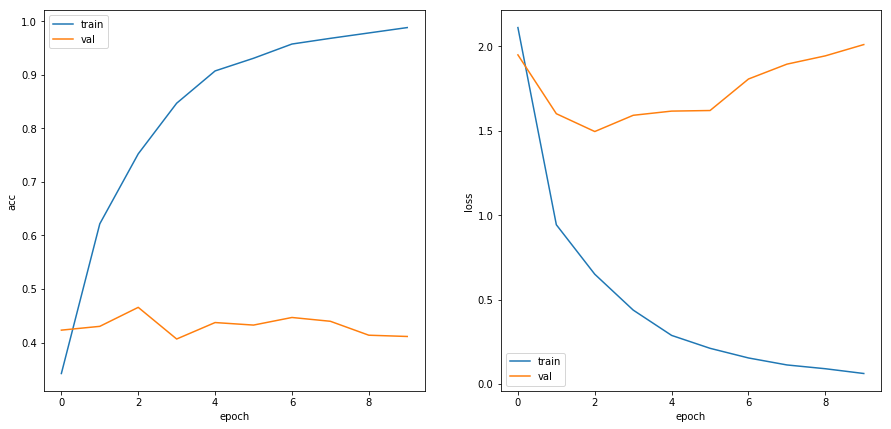

In [40]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)

hist = loss_hist.history
hist_df = pd.DataFrame(loss_hist.history)
hist_csv_file = 'loss_hist9.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 4th - 2 GRU, 1F w dropout, bn, reg

In [41]:
reg1 = regularizers.l2(0.01)
reg2 = regularizers.l1(0.001)

In [42]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn1 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(p1)
rnn2 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(rnn1)
flt = layers.Flatten()(rnn2)

ff = layers.Dense(100, kernel_regularizer=reg1, activity_regularizer=reg1)(flt)
bn = layers.BatchNormalization()(ff)
ac = layers.ELU()(bn)
dr = layers.Dropout(0.5)(ac)

outputs = layers.Dense(4, activation='softmax')(dr)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 22, 1000)          0         
_________________________________________________________________
permute_10 (Permute)         (None, 1000, 22)          0         
_________________________________________________________________
gru_9 (GRU)                  (None, 1000, 20)          2580      
_________________________________________________________________
gru_10 (GRU)                 (None, 1000, 20)          2460      
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               2000100   
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400

In [43]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=10)

Train on 1692 samples, validate on 423 samples
Epoch 1/10
1692/1692 [==============================] - 99s 59ms/step - loss: 4318.0358 - acc: 0.3097 - val_loss: 3257.1905 - val_acc: 0.3664
Epoch 2/10
1692/1692 [==============================] - 98s 58ms/step - loss: 2624.4097 - acc: 0.4645 - val_loss: 2000.3947 - val_acc: 0.3546
Epoch 3/10
1692/1692 [==============================] - 99s 58ms/step - loss: 1624.1137 - acc: 0.5615 - val_loss: 1258.5596 - val_acc: 0.3286
Epoch 4/10
1692/1692 [==============================] - 98s 58ms/step - loss: 1020.0832 - acc: 0.6478 - val_loss: 778.8883 - val_acc: 0.3050
Epoch 5/10
1692/1692 [==============================] - 98s 58ms/step - loss: 630.2640 - acc: 0.6578 - val_loss: 480.1615 - val_acc: 0.2979
Epoch 6/10
1692/1692 [==============================] - 98s 58ms/step - loss: 384.6391 - acc: 0.6885 - val_loss: 291.2911 - val_acc: 0.3215
Epoch 7/10
1692/1692 [==============================] - 98s 58ms/step - loss: 237.8031 - acc: 0.6980 - val


# Evaluate on test data
443/443 [==============================] - 9s 21ms/step
test loss, test acc: [57.87700727131243, 0.30925509333610535]


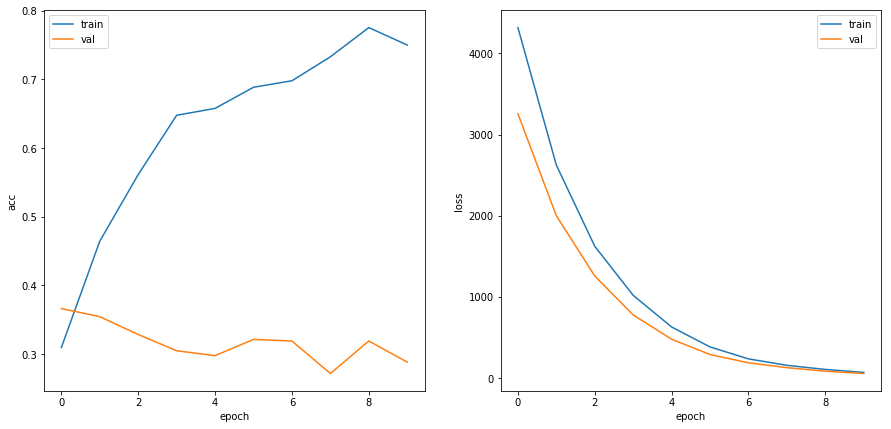

In [44]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)

hist = loss_hist.history
hist_df = pd.DataFrame(loss_hist.history)
hist_csv_file = 'loss_hist10.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 5th - 2 GRU, 2F w dropout, bn, reg

In [45]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn1 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(p1)
rnn2 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(rnn1)
flt = layers.Flatten()(rnn2)

ff = layers.Dense(100, kernel_regularizer=reg1, activity_regularizer=reg1)(flt)
bn = layers.BatchNormalization()(ff)
ac = layers.ELU()(bn)
dr = layers.Dropout(0.5)(ac)

ff2 = layers.Dense(40, kernel_regularizer=reg1, activity_regularizer=reg1)(dr)
bn2 = layers.BatchNormalization()(ff2)
ac2 = layers.ELU()(bn2)
dr2 = layers.Dropout(0.5)(ac2)

outputs = layers.Dense(4, activation='softmax')(dr2)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 22, 1000)          0         
_________________________________________________________________
permute_11 (Permute)         (None, 1000, 22)          0         
_________________________________________________________________
gru_11 (GRU)                 (None, 1000, 20)          2580      
_________________________________________________________________
gru_12 (GRU)                 (None, 1000, 20)          2460      
_________________________________________________________________
flatten_3 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               2000100   
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400

In [46]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=50)

Train on 1692 samples, validate on 423 samples
Epoch 1/50
1692/1692 [==============================] - 99s 59ms/step - loss: 4003.0032 - acc: 0.2648 - val_loss: 2981.7450 - val_acc: 0.3121
Epoch 2/50
1692/1692 [==============================] - 98s 58ms/step - loss: 2426.2259 - acc: 0.2991 - val_loss: 1874.4140 - val_acc: 0.3050
Epoch 3/50
1692/1692 [==============================] - 98s 58ms/step - loss: 1544.2570 - acc: 0.3351 - val_loss: 1182.6125 - val_acc: 0.3073
Epoch 4/50
1692/1692 [==============================] - 98s 58ms/step - loss: 950.1660 - acc: 0.3706 - val_loss: 703.8929 - val_acc: 0.2837
Epoch 5/50
1692/1692 [==============================] - 98s 58ms/step - loss: 563.1078 - acc: 0.3918 - val_loss: 423.2459 - val_acc: 0.2553
Epoch 6/50
1692/1692 [==============================] - 99s 58ms/step - loss: 340.1448 - acc: 0.4037 - val_loss: 254.9318 - val_acc: 0.2908
Epoch 7/50
1692/1692 [==============================] - 98s 58ms/step - loss: 201.3918 - acc: 0.4474 - val_


# Evaluate on test data
443/443 [==============================] - 10s 21ms/step
test loss, test acc: [4.1407787428483465, 0.3589164912700653]


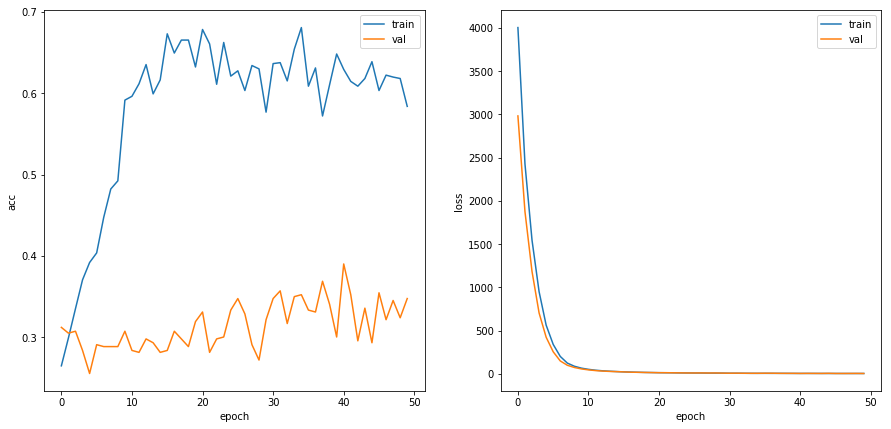

In [47]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)

hist = loss_hist.history
hist_df = pd.DataFrame(loss_hist.history)
hist_csv_file = 'loss_hist11.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 6th - 1Conv 2 GRU, 2F

In [48]:
inputs = layers.Input(shape=(22, 1000))
r1 = layers.Reshape((22, 1000, 1))(inputs)
c1 = layers.Conv2D(10, (22, 10), strides=(1, 1))(r1)
r2 = layers.Reshape((991, 10))(c1)

rnn1 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(r2)
rnn2 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(rnn1)
flt = layers.Flatten()(rnn2)

ff = layers.Dense(100, kernel_regularizer=reg1, activity_regularizer=reg1)(flt)
bn = layers.BatchNormalization()(ff)
ac = layers.ELU()(bn)
dr = layers.Dropout(0.5)(ac)

ff2 = layers.Dense(40, kernel_regularizer=reg1, activity_regularizer=reg1)(dr)
bn2 = layers.BatchNormalization()(ff2)
ac2 = layers.ELU()(bn2)
dr2 = layers.Dropout(0.5)(ac2)

outputs = layers.Dense(4, activation='softmax')(dr2)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 22, 1000)          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 22, 1000, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 991, 10)        2210      
_________________________________________________________________
reshape_2 (Reshape)          (None, 991, 10)           0         
_________________________________________________________________
gru_13 (GRU)                 (None, 991, 20)           1860      
_________________________________________________________________
gru_14 (GRU)                 (None, 991, 20)           2460      
_________________________________________________________________
flatten_4 (Flatten)          (None, 19820)             0  

In [49]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=10)

Train on 1692 samples, validate on 423 samples
Epoch 1/10
1692/1692 [==============================] - 104s 62ms/step - loss: 1154.4448 - acc: 0.2583 - val_loss: 254.1585 - val_acc: 0.2695
Epoch 2/10
1692/1692 [==============================] - 103s 61ms/step - loss: 155.5532 - acc: 0.2736 - val_loss: 81.7010 - val_acc: 0.2600
Epoch 3/10
1692/1692 [==============================] - 102s 61ms/step - loss: 74.7900 - acc: 0.3268 - val_loss: 51.0401 - val_acc: 0.2506
Epoch 4/10
1692/1692 [==============================] - 102s 61ms/step - loss: 43.7490 - acc: 0.3635 - val_loss: 33.3077 - val_acc: 0.2695
Epoch 5/10
1692/1692 [==============================] - 102s 60ms/step - loss: 31.2307 - acc: 0.4285 - val_loss: 24.0566 - val_acc: 0.2577
Epoch 6/10
1692/1692 [==============================] - 102s 60ms/step - loss: 23.3058 - acc: 0.4852 - val_loss: 19.7395 - val_acc: 0.2766
Epoch 7/10
1692/1692 [==============================] - 102s 61ms/step - loss: 19.8346 - acc: 0.5337 - val_loss: 15


# Evaluate on test data
443/443 [==============================] - 10s 22ms/step
test loss, test acc: [10.03538797133125, 0.31602707505226135]


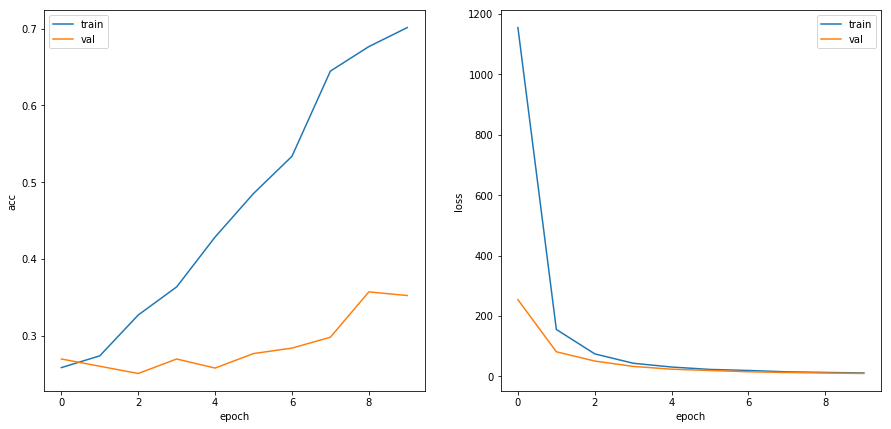

In [50]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)

hist = loss_hist.history
hist_df = pd.DataFrame(loss_hist.history)
hist_csv_file = 'loss_hist12.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 7th - 2 Conv 1Pool 2 GRU, 2F

In [51]:
inputs = layers.Input(shape=(22, 1000))
r1 = layers.Reshape((1, 22, 1000))(inputs)
c1 = layers.Conv2D(10, (11, 10), strides = (1,2),activation='elu',
                  data_format='channels_first')(r1)
r2 = layers.Reshape((1, 10*12, 496))(c1)
c2 = layers.Conv2D(20, (120, 10),activation='elu',
                  data_format='channels_first')(r2)
r3 = layers.Reshape((1, 20, 487))(c2)
m1 = layers.MaxPool2D(data_format='channels_first')(r3)
r4 = layers.Reshape((10, 243))(m1)
p1 = layers.Permute((2, 1))(r4)

rnn1 = layers.GRU(10, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(p1)
rnn2 = layers.GRU(10, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(rnn1)
flt = layers.Flatten()(rnn2)

ff = layers.Dense(100, kernel_regularizer=reg1, activity_regularizer=reg1)(flt)
bn = layers.BatchNormalization()(ff)
ac = layers.ELU()(bn)
dr = layers.Dropout(0.5)(ac)

ff2 = layers.Dense(40, kernel_regularizer=reg1, activity_regularizer=reg1)(dr)
bn2 = layers.BatchNormalization()(ff2)
ac2 = layers.ELU()(bn2)
dr2 = layers.Dropout(0.5)(ac2)

outputs = layers.Dense(4, activation='softmax')(dr2)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 22, 1000)          0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 1, 22, 1000)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 12, 496)       1110      
_________________________________________________________________
reshape_4 (Reshape)          (None, 1, 120, 496)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 1, 487)        24020     
_________________________________________________________________
reshape_5 (Reshape)          (None, 1, 20, 487)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 10, 243)        0  

In [52]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=50)

Train on 1692 samples, validate on 423 samples
Epoch 1/50
1692/1692 [==============================] - 26s 16ms/step - loss: 47.0820 - acc: 0.2512 - val_loss: 6.8197 - val_acc: 0.2459
Epoch 2/50
1692/1692 [==============================] - 25s 15ms/step - loss: 9.8816 - acc: 0.2713 - val_loss: 4.9277 - val_acc: 0.2506
Epoch 3/50
1692/1692 [==============================] - 25s 15ms/step - loss: 6.3000 - acc: 0.2908 - val_loss: 4.3253 - val_acc: 0.2979
Epoch 4/50
1692/1692 [==============================] - 25s 15ms/step - loss: 5.2163 - acc: 0.3038 - val_loss: 3.9385 - val_acc: 0.2908
Epoch 5/50
1692/1692 [==============================] - 25s 15ms/step - loss: 4.4671 - acc: 0.3511 - val_loss: 3.7134 - val_acc: 0.2837
Epoch 6/50
1692/1692 [==============================] - 25s 15ms/step - loss: 4.0380 - acc: 0.3989 - val_loss: 3.5753 - val_acc: 0.3215
Epoch 7/50
1692/1692 [==============================] - 25s 15ms/step - loss: 4.8129 - acc: 0.3918 - val_loss: 3.3847 - val_acc: 0.3452



# Evaluate on test data
443/443 [==============================] - 3s 6ms/step
test loss, test acc: [3.196837990332403, 0.44695258140563965]


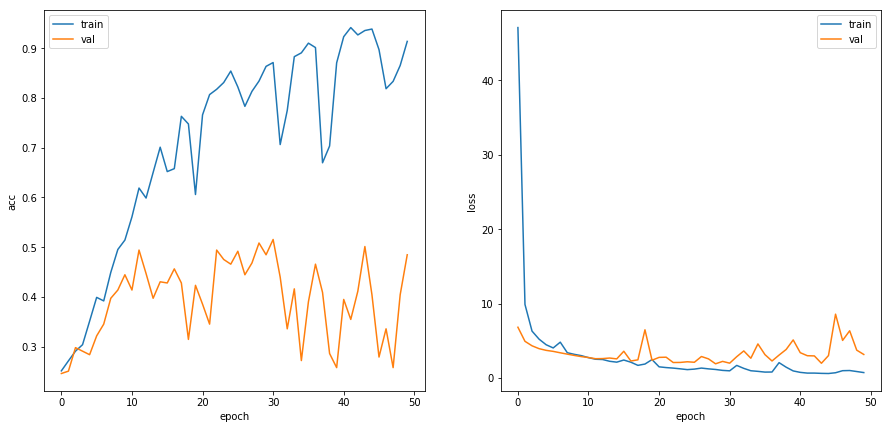

In [53]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)

hist = loss_hist.history
hist_df = pd.DataFrame(loss_hist.history)
hist_csv_file = 'loss_hist13.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 8th - 3 Conv 2Pool 3 GRU, 2F

In [54]:
inputs = layers.Input(shape=(22, 1000))
r1 = layers.Reshape((1, 22, 1000))(inputs)
c1 = layers.Conv2D(22, (11, 10),activation='elu',
                  data_format='channels_first')(r1)
r2 = layers.Reshape((1, 22*12, 991))(c1)
m1 = layers.MaxPool2D(data_format='channels_first')(r2)
c2 = layers.Conv2D(22, (132, 10),activation='elu',
                  data_format='channels_first')(m1)
r3 = layers.Reshape((1, 22, 486))(c2)
m2 = layers.MaxPool2D(data_format='channels_first')(r3)
c3 = layers.Conv2D(22, (11, 10),activation='elu',
                  data_format='channels_first')(m2)
r4 = layers.Reshape((22, 234))(c3)

p1 = layers.Permute((2, 1))(r4)

rnn1 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(p1)
rnn2 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(rnn1)
rnn3 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(rnn2)
flt = layers.Flatten()(rnn2)

ff = layers.Dense(100, kernel_regularizer=reg1, activity_regularizer=reg1)(flt)
bn = layers.BatchNormalization()(ff)
ac = layers.ELU()(bn)
dr = layers.Dropout(0.5)(ac)

ff2 = layers.Dense(40, kernel_regularizer=reg1, activity_regularizer=reg1)(dr)
bn2 = layers.BatchNormalization()(ff2)
ac2 = layers.ELU()(bn2)
dr2 = layers.Dropout(0.5)(ac2)

outputs = layers.Dense(4, activation='softmax')(dr2)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 22, 1000)          0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 1, 22, 1000)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 12, 991)       2442      
_________________________________________________________________
reshape_8 (Reshape)          (None, 1, 264, 991)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 132, 495)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 1, 486)        29062     
_________________________________________________________________
reshape_9 (Reshape)          (None, 1, 22, 486)        0  

In [55]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=200)

Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 26s 15ms/step - loss: 14.5934 - acc: 0.2447 - val_loss: 4.4488 - val_acc: 0.2742
Epoch 2/200
1692/1692 [==============================] - 24s 14ms/step - loss: 4.5453 - acc: 0.2695 - val_loss: 4.1831 - val_acc: 0.2742
Epoch 3/200
1692/1692 [==============================] - 24s 14ms/step - loss: 4.1083 - acc: 0.3050 - val_loss: 3.8836 - val_acc: 0.2742
Epoch 4/200
1692/1692 [==============================] - 24s 14ms/step - loss: 3.7426 - acc: 0.3552 - val_loss: 3.6126 - val_acc: 0.2861
Epoch 5/200
1692/1692 [==============================] - 24s 14ms/step - loss: 3.4472 - acc: 0.3534 - val_loss: 3.3602 - val_acc: 0.2742
Epoch 6/200
1692/1692 [==============================] - 24s 14ms/step - loss: 3.1425 - acc: 0.4007 - val_loss: 3.1305 - val_acc: 0.2908
Epoch 7/200
1692/1692 [==============================] - 24s 14ms/step - loss: 2.8996 - acc: 0.4090 - val_loss: 2.9293 - val_acc: 

1692/1692 [==============================] - 25s 15ms/step - loss: 1.1232 - acc: 0.8067 - val_loss: 4.0002 - val_acc: 0.3168
Epoch 61/200
1692/1692 [==============================] - 24s 14ms/step - loss: 1.1039 - acc: 0.8174 - val_loss: 3.3837 - val_acc: 0.3121
Epoch 62/200
1692/1692 [==============================] - 24s 14ms/step - loss: 1.0427 - acc: 0.8339 - val_loss: 2.7378 - val_acc: 0.3191
Epoch 63/200
1692/1692 [==============================] - 24s 14ms/step - loss: 1.1221 - acc: 0.8150 - val_loss: 4.1123 - val_acc: 0.2695
Epoch 64/200
1692/1692 [==============================] - 24s 14ms/step - loss: 1.1469 - acc: 0.7896 - val_loss: 3.6041 - val_acc: 0.3121
Epoch 65/200
1692/1692 [==============================] - 24s 14ms/step - loss: 1.1032 - acc: 0.8109 - val_loss: 3.7078 - val_acc: 0.3121
Epoch 66/200
1692/1692 [==============================] - 24s 14ms/step - loss: 1.0397 - acc: 0.8268 - val_loss: 5.6245 - val_acc: 0.2813
Epoch 67/200
1692/1692 [=======================

1692/1692 [==============================] - 24s 14ms/step - loss: 0.8233 - acc: 0.8652 - val_loss: 16.1283 - val_acc: 0.2364
Epoch 120/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.8022 - acc: 0.8930 - val_loss: 5.3821 - val_acc: 0.3050
Epoch 121/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.7643 - acc: 0.9066 - val_loss: 6.5943 - val_acc: 0.2861
Epoch 122/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.7948 - acc: 0.8901 - val_loss: 4.7022 - val_acc: 0.2671
Epoch 123/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.7608 - acc: 0.9025 - val_loss: 6.0788 - val_acc: 0.2884
Epoch 124/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.7903 - acc: 0.8918 - val_loss: 5.0992 - val_acc: 0.3381
Epoch 125/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.6652 - acc: 0.9249 - val_loss: 5.4145 - val_acc: 0.2955
Epoch 126/200
1692/1692 [===============

1692/1692 [==============================] - 25s 14ms/step - loss: 0.3747 - acc: 0.9752 - val_loss: 6.5772 - val_acc: 0.3144
Epoch 179/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.4525 - acc: 0.9421 - val_loss: 11.0128 - val_acc: 0.3191
Epoch 180/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.4692 - acc: 0.9480 - val_loss: 4.9764 - val_acc: 0.3215
Epoch 181/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.4889 - acc: 0.9403 - val_loss: 6.7796 - val_acc: 0.2955
Epoch 182/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.4655 - acc: 0.9504 - val_loss: 11.3466 - val_acc: 0.2459
Epoch 183/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.5796 - acc: 0.9196 - val_loss: 3.7598 - val_acc: 0.3641
Epoch 184/200
1692/1692 [==============================] - 24s 14ms/step - loss: 0.6642 - acc: 0.9108 - val_loss: 9.3180 - val_acc: 0.3262
Epoch 185/200
1692/1692 [==============


# Evaluate on test data
443/443 [==============================] - 3s 6ms/step
test loss, test acc: [7.705439060590068, 0.2753950357437134]


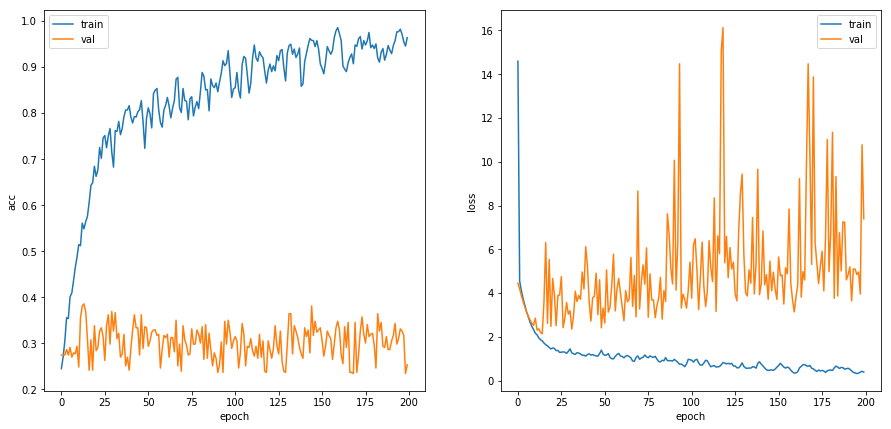

In [56]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)

hist = loss_hist.history
hist_df = pd.DataFrame(loss_hist.history)
hist_csv_file = 'loss_hist14.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 9th - Shallow ConvNet

In [57]:
from keras import backend as K
def Ksquare(x):
    return K.pow(x, 2)
def Klog(x):
    return K.log(x)

In [58]:
inputs = layers.Input(shape=(22, 1000))
r1 = layers.Reshape((1, 22, 1000))(inputs)
c1 = layers.Conv2D(40, (1, 25), strides=1, activation='elu',
                  data_format='channels_first')(r1)
r2 = layers.Reshape((1, 40*22, 976))(c1)
c2 = layers.Conv2D(40, (40*22, 1), strides=1, activation='elu',
                  data_format='channels_first')(r2)
sq1 = layers.Activation(Ksquare)(c2)
r3 = layers.Reshape((1, 40, 976))(sq1)
apool1 = layers.AveragePooling2D((1, 75), strides=(1, 15), 
                                 data_format = 'channels_first')(r3)
log1 = layers.Activation(Klog)(apool1)
f1 = layers.Flatten()(log1)
outputs = layers.Dense(4, activation='softmax')(f1)
model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 22, 1000)          0         
_________________________________________________________________
reshape_11 (Reshape)         (None, 1, 22, 1000)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 40, 22, 976)       1040      
_________________________________________________________________
reshape_12 (Reshape)         (None, 1, 880, 976)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 1, 976)        35240     
_________________________________________________________________
activation_1 (Activation)    (None, 40, 1, 976)        0         
_________________________________________________________________
reshape_13 (Reshape)         (None, 1, 40, 976)        0  

In [59]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=200)

Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 2s 1ms/step - loss: 1.9107 - acc: 0.2896 - val_loss: 1.4068 - val_acc: 0.3121
Epoch 2/200
1692/1692 [==============================] - 2s 1ms/step - loss: 1.2846 - acc: 0.4037 - val_loss: 1.3282 - val_acc: 0.3877
Epoch 3/200
1692/1692 [==============================] - 2s 1ms/step - loss: 1.1688 - acc: 0.4722 - val_loss: 1.2574 - val_acc: 0.4303
Epoch 4/200
1692/1692 [==============================] - 2s 1ms/step - loss: 1.0668 - acc: 0.5585 - val_loss: 1.2411 - val_acc: 0.4326
Epoch 5/200
1692/1692 [==============================] - 2s 1ms/step - loss: 0.9592 - acc: 0.6099 - val_loss: 1.1905 - val_acc: 0.4799
Epoch 6/200
1692/1692 [==============================] - 2s 1ms/step - loss: 0.8269 - acc: 0.6755 - val_loss: 1.1428 - val_acc: 0.5130
Epoch 7/200
1692/1692 [==============================] - 2s 1ms/step - loss: 0.7387 - acc: 0.7175 - val_loss: 1.1711 - val_acc: 0.5272
Epoch 8/

Epoch 61/200
1692/1692 [==============================] - 2s 1ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.8536 - val_acc: 0.5887
Epoch 62/200
1692/1692 [==============================] - 2s 1ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.8469 - val_acc: 0.5792
Epoch 63/200
1692/1692 [==============================] - 2s 1ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.8697 - val_acc: 0.5816
Epoch 64/200
1692/1692 [==============================] - 2s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.8437 - val_acc: 0.5816
Epoch 65/200
1692/1692 [==============================] - 2s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.8863 - val_acc: 0.5768
Epoch 66/200
1692/1692 [==============================] - 2s 1ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.8812 - val_acc: 0.5816
Epoch 67/200
1692/1692 [==============================] - 2s 1ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.8708 - val_acc: 0.5887
Epoch 68/200
1692/1692 [========================

1692/1692 [==============================] - 2s 1ms/step - loss: 2.0846e-04 - acc: 1.0000 - val_loss: 2.1834 - val_acc: 0.5863
Epoch 120/200
1692/1692 [==============================] - 2s 1ms/step - loss: 2.0543e-04 - acc: 1.0000 - val_loss: 2.1776 - val_acc: 0.6076
Epoch 121/200
1692/1692 [==============================] - 2s 1ms/step - loss: 1.9704e-04 - acc: 1.0000 - val_loss: 2.1842 - val_acc: 0.5957
Epoch 122/200
1692/1692 [==============================] - 2s 1ms/step - loss: 1.9491e-04 - acc: 1.0000 - val_loss: 2.2028 - val_acc: 0.5957
Epoch 123/200
1692/1692 [==============================] - 2s 1ms/step - loss: 1.8538e-04 - acc: 1.0000 - val_loss: 2.1983 - val_acc: 0.5957
Epoch 124/200
1692/1692 [==============================] - 2s 1ms/step - loss: 1.8350e-04 - acc: 1.0000 - val_loss: 2.2062 - val_acc: 0.5981
Epoch 125/200
1692/1692 [==============================] - 2s 1ms/step - loss: 1.7656e-04 - acc: 1.0000 - val_loss: 2.2197 - val_acc: 0.6005
Epoch 126/200
1692/1692 [==

1692/1692 [==============================] - 2s 1ms/step - loss: 3.5994e-05 - acc: 1.0000 - val_loss: 2.4689 - val_acc: 0.5934
Epoch 178/200
1692/1692 [==============================] - 2s 1ms/step - loss: 3.2868e-05 - acc: 1.0000 - val_loss: 2.4747 - val_acc: 0.5910
Epoch 179/200
1692/1692 [==============================] - 2s 1ms/step - loss: 3.1786e-05 - acc: 1.0000 - val_loss: 2.4745 - val_acc: 0.5957
Epoch 180/200
1692/1692 [==============================] - 2s 1ms/step - loss: 3.1495e-05 - acc: 1.0000 - val_loss: 2.4850 - val_acc: 0.5934
Epoch 181/200
1692/1692 [==============================] - 2s 1ms/step - loss: 3.0112e-05 - acc: 1.0000 - val_loss: 2.4913 - val_acc: 0.5957
Epoch 182/200
1692/1692 [==============================] - 2s 1ms/step - loss: 2.9758e-05 - acc: 1.0000 - val_loss: 2.4719 - val_acc: 0.6028
Epoch 183/200
1692/1692 [==============================] - 2s 1ms/step - loss: 2.8490e-05 - acc: 1.0000 - val_loss: 2.4978 - val_acc: 0.5863
Epoch 184/200
1692/1692 [==


# Evaluate on test data
443/443 [==============================] - 0s 567us/step
test loss, test acc: [2.759568609986833, 0.5778781175613403]


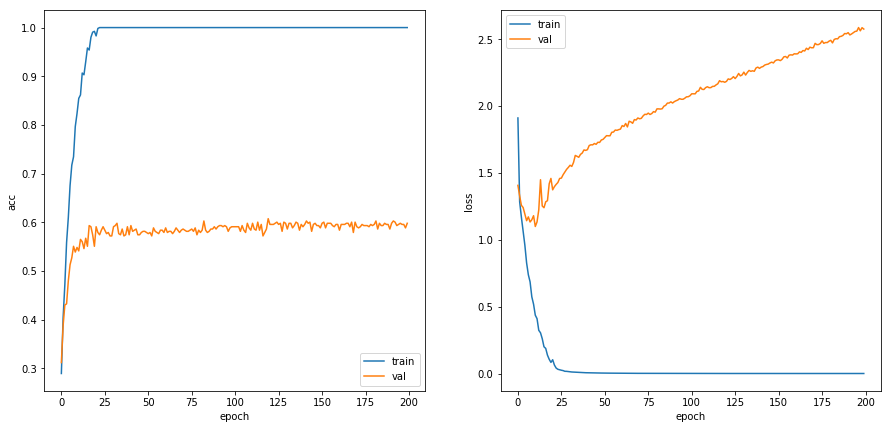

In [60]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)

hist = loss_hist.history
hist_df = pd.DataFrame(loss_hist.history)
hist_csv_file = 'loss_hist15.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 10th - Deep ConvNet

In [61]:
inputs = layers.Input(shape=(22, 1000))
r1 = layers.Reshape((1, 22, 1000))(inputs)
c1 = layers.Conv2D(25, (1, 10), strides=1, activation='elu',
                  data_format='channels_first')(r1)
r2 = layers.Reshape((1, 25*22, 991))(c1)
c2 = layers.Conv2D(25, (25*22, 1), strides=1, activation='elu',
                  data_format='channels_first')(r2)
r3 = layers.Reshape((1, 25, 991))(c2)
m1 = layers.MaxPool2D(strides=(1,3),data_format='channels_first')(r3)

c3 = layers.Conv2D(50, (24, 10), strides=1, activation='elu',
                  data_format='channels_first')(m1)
r4 = layers.Reshape((1, 50, 321))(c3)
m2 = layers.MaxPool2D(strides=(1,3),data_format='channels_first')(r4)

c4 = layers.Conv2D(100, (49, 10), strides=1, activation='elu',
                  data_format='channels_first')(m2)
r5 = layers.Reshape((1, 100, 98))(c4)
m3 = layers.MaxPool2D(strides=(1,3),data_format='channels_first')(r5)

c5 = layers.Conv2D(200, (99, 10), strides=1, activation='elu',
                  data_format='channels_first')(m3)
r6 = layers.Reshape((1, 200, 24))(c5)
m4 = layers.MaxPool2D(strides=(1,3),data_format='channels_first')(r6)

f1 = layers.Flatten()(m4)
outputs = layers.Dense(4, activation='softmax')(f1)
model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 22, 1000)          0         
_________________________________________________________________
reshape_14 (Reshape)         (None, 1, 22, 1000)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 22, 991)       275       
_________________________________________________________________
reshape_15 (Reshape)         (None, 1, 550, 991)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 1, 991)        13775     
_________________________________________________________________
reshape_16 (Reshape)         (None, 1, 25, 991)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 24, 330)        0  

In [62]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=200)

Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 2s 1ms/step - loss: 1.3847 - acc: 0.2937 - val_loss: 1.3119 - val_acc: 0.3712
Epoch 2/200
1692/1692 [==============================] - 1s 825us/step - loss: 1.3019 - acc: 0.3818 - val_loss: 1.2467 - val_acc: 0.3972
Epoch 3/200
1692/1692 [==============================] - 1s 822us/step - loss: 1.2497 - acc: 0.4267 - val_loss: 1.2870 - val_acc: 0.4184
Epoch 4/200
1692/1692 [==============================] - 1s 822us/step - loss: 1.1842 - acc: 0.4610 - val_loss: 1.1838 - val_acc: 0.4515
Epoch 5/200
1692/1692 [==============================] - 1s 822us/step - loss: 1.0903 - acc: 0.5378 - val_loss: 1.2659 - val_acc: 0.4043
Epoch 6/200
1692/1692 [==============================] - 1s 826us/step - loss: 0.9320 - acc: 0.6028 - val_loss: 1.3784 - val_acc: 0.3995
Epoch 7/200
1692/1692 [==============================] - 1s 825us/step - loss: 0.6733 - acc: 0.7470 - val_loss: 1.3654 - val_acc: 0.4

1692/1692 [==============================] - 1s 828us/step - loss: 3.2361e-06 - acc: 1.0000 - val_loss: 7.5682 - val_acc: 0.4066
Epoch 60/200
1692/1692 [==============================] - 1s 823us/step - loss: 3.1104e-06 - acc: 1.0000 - val_loss: 7.5711 - val_acc: 0.4066
Epoch 61/200
1692/1692 [==============================] - 1s 823us/step - loss: 2.9962e-06 - acc: 1.0000 - val_loss: 7.5736 - val_acc: 0.4066
Epoch 62/200
1692/1692 [==============================] - 1s 828us/step - loss: 2.8912e-06 - acc: 1.0000 - val_loss: 7.5765 - val_acc: 0.4066
Epoch 63/200
1692/1692 [==============================] - 1s 823us/step - loss: 2.7916e-06 - acc: 1.0000 - val_loss: 7.5789 - val_acc: 0.4066
Epoch 64/200
1692/1692 [==============================] - 1s 825us/step - loss: 2.6946e-06 - acc: 1.0000 - val_loss: 7.5815 - val_acc: 0.4066
Epoch 65/200
1692/1692 [==============================] - 1s 825us/step - loss: 2.6055e-06 - acc: 1.0000 - val_loss: 7.5838 - val_acc: 0.4066
Epoch 66/200
1692/1

1692/1692 [==============================] - 1s 822us/step - loss: 6.6326e-07 - acc: 1.0000 - val_loss: 7.7054 - val_acc: 0.4043
Epoch 117/200
1692/1692 [==============================] - 1s 824us/step - loss: 6.4755e-07 - acc: 1.0000 - val_loss: 7.7079 - val_acc: 0.4043
Epoch 118/200
1692/1692 [==============================] - 1s 823us/step - loss: 6.3127e-07 - acc: 1.0000 - val_loss: 7.7105 - val_acc: 0.4043
Epoch 119/200
1692/1692 [==============================] - 1s 823us/step - loss: 6.1746e-07 - acc: 1.0000 - val_loss: 7.7127 - val_acc: 0.4043
Epoch 120/200
1692/1692 [==============================] - 1s 825us/step - loss: 6.0231e-07 - acc: 1.0000 - val_loss: 7.7152 - val_acc: 0.4043
Epoch 121/200
1692/1692 [==============================] - 1s 823us/step - loss: 5.8780e-07 - acc: 1.0000 - val_loss: 7.7175 - val_acc: 0.4043
Epoch 122/200
1692/1692 [==============================] - 1s 823us/step - loss: 5.7505e-07 - acc: 1.0000 - val_loss: 7.7200 - val_acc: 0.4043
Epoch 123/200

Epoch 173/200
1692/1692 [==============================] - 1s 824us/step - loss: 1.7515e-07 - acc: 1.0000 - val_loss: 7.8484 - val_acc: 0.4137
Epoch 174/200
1692/1692 [==============================] - 1s 826us/step - loss: 1.7120e-07 - acc: 1.0000 - val_loss: 7.8509 - val_acc: 0.4137
Epoch 175/200
1692/1692 [==============================] - 1s 826us/step - loss: 1.6754e-07 - acc: 1.0000 - val_loss: 7.8536 - val_acc: 0.4137
Epoch 176/200
1692/1692 [==============================] - 1s 825us/step - loss: 1.6381e-07 - acc: 1.0000 - val_loss: 7.8564 - val_acc: 0.4137
Epoch 177/200
1692/1692 [==============================] - 1s 823us/step - loss: 1.6007e-07 - acc: 1.0000 - val_loss: 7.8592 - val_acc: 0.4137
Epoch 178/200
1692/1692 [==============================] - 1s 826us/step - loss: 1.5585e-07 - acc: 1.0000 - val_loss: 7.8616 - val_acc: 0.4137
Epoch 179/200
1692/1692 [==============================] - 1s 827us/step - loss: 1.5239e-07 - acc: 1.0000 - val_loss: 7.8643 - val_acc: 0.4137


# Evaluate on test data
443/443 [==============================] - 0s 531us/step
test loss, test acc: [7.465500222371879, 0.44243791699409485]


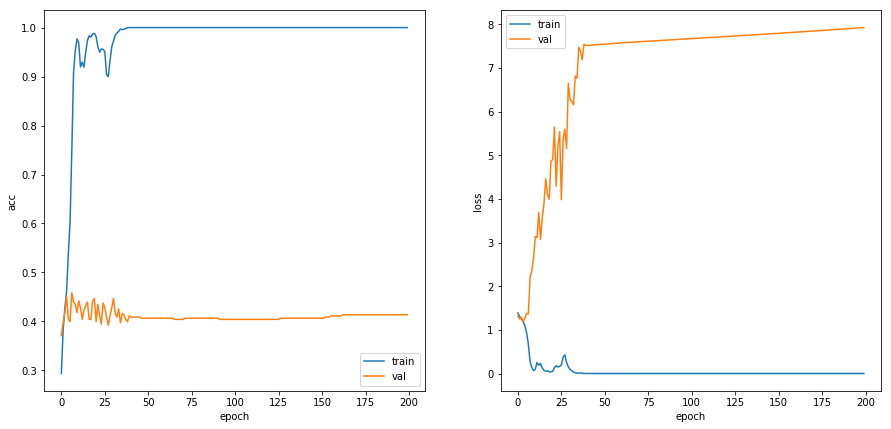

In [63]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test3, y_test3)
print('test loss, test acc:', results)

hist = loss_hist.history
hist_df = pd.DataFrame(loss_hist.history)
hist_csv_file = 'loss_hist16.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# 11th - 3 Conv 4 GRU- densly connected, 2F

In [67]:
inputs = layers.Input(shape=(22, 1000))
r1 = layers.Reshape((1, 22, 1000))(inputs)
c1 = layers.Conv2D(32, (1, 10),activation='elu',
                  data_format='channels_first')(r1)
r2 = layers.Reshape((1, 22*32, 991))(c1)
c2 = layers.Conv2D(64, (704, 1),activation='elu',
                  data_format='channels_first')(r2)
r3 = layers.Reshape((1, 64, 991))(c2)
m1 = layers.MaxPool2D(strides = (1,3), data_format='channels_first')(r3)
c3 = layers.Conv2D(128, (63, 10),activation='elu',
                  data_format='channels_first')(m1)
r4 = layers.Reshape((128, 321))(c3)

p1 = layers.Permute((2, 1))(r4)

rnn1 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(p1)
rnn2 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(rnn1)
cat1 = layers.Concatenate()([rnn1, rnn2])
rnn3 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(cat1)
cat2 = layers.Concatenate()([rnn1, rnn2, rnn3])
rnn4 = layers.GRU(20, return_sequences=True, kernel_regularizer=reg1, activity_regularizer=reg1)(cat2)
flt = layers.Flatten()(rnn4)

ff = layers.Dense(100, kernel_regularizer=reg1, activity_regularizer=reg1)(flt)
bn = layers.BatchNormalization()(ff)
ac = layers.ELU()(bn)
dr = layers.Dropout(0.5)(ac)
ff2 = layers.Dense(40, kernel_regularizer=reg1, activity_regularizer=reg1)(dr)
bn2 = layers.BatchNormalization()(ff2)
ac2 = layers.ELU()(bn2)
dr2 = layers.Dropout(0.5)(ac2)
outputs = layers.Dense(4, activation='softmax')(dr2)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 22, 1000)     0                                            
__________________________________________________________________________________________________
reshape_25 (Reshape)            (None, 1, 22, 1000)  0           input_18[0][0]                   
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 32, 22, 991)  352         reshape_25[0][0]                 
__________________________________________________________________________________________________
reshape_26 (Reshape)            (None, 1, 704, 991)  0           conv2d_17[0][0]                  
___________________________________________________________________________________________

In [68]:
loss_hist = model.fit(Xtrain3, ytrain3, validation_data=(Xval3, yval3), epochs=200)

Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 68s 40ms/step - loss: 56.5320 - acc: 0.2429 - val_loss: 8.2491 - val_acc: 0.2742
Epoch 2/200
1692/1692 [==============================] - 68s 40ms/step - loss: 9.1151 - acc: 0.2748 - val_loss: 6.1312 - val_acc: 0.2742
Epoch 3/200
1692/1692 [==============================] - 66s 39ms/step - loss: 6.7665 - acc: 0.3026 - val_loss: 5.4811 - val_acc: 0.2742
Epoch 4/200
1692/1692 [==============================] - 67s 40ms/step - loss: 5.6860 - acc: 0.3652 - val_loss: 5.0713 - val_acc: 0.2742
Epoch 5/200
1692/1692 [==============================] - 67s 39ms/step - loss: 5.1351 - acc: 0.4338 - val_loss: 4.7578 - val_acc: 0.3050
Epoch 6/200
1692/1692 [==============================] - 66s 39ms/step - loss: 4.6776 - acc: 0.4835 - val_loss: 4.4733 - val_acc: 0.3452
Epoch 7/200
1692/1692 [==============================] - 67s 40ms/step - loss: 4.3284 - acc: 0.5278 - val_loss: 4.2371 - val_acc: 

1692/1692 [==============================] - 66s 39ms/step - loss: 1.3559 - acc: 0.8546 - val_loss: 4.0292 - val_acc: 0.3830
Epoch 61/200
1692/1692 [==============================] - 65s 39ms/step - loss: 1.8402 - acc: 0.7642 - val_loss: 3.8054 - val_acc: 0.3806
Epoch 62/200
1692/1692 [==============================] - 65s 39ms/step - loss: 1.9716 - acc: 0.7772 - val_loss: 2.8755 - val_acc: 0.4775
Epoch 63/200
1692/1692 [==============================] - 67s 39ms/step - loss: 1.6306 - acc: 0.8611 - val_loss: 3.1029 - val_acc: 0.4397
Epoch 64/200
1692/1692 [==============================] - 65s 39ms/step - loss: 1.2856 - acc: 0.9196 - val_loss: 2.5345 - val_acc: 0.4917
Epoch 65/200
1692/1692 [==============================] - 65s 38ms/step - loss: 1.0944 - acc: 0.9397 - val_loss: 2.4693 - val_acc: 0.4468
Epoch 66/200
1692/1692 [==============================] - 65s 38ms/step - loss: 0.9664 - acc: 0.9527 - val_loss: 2.4715 - val_acc: 0.4539
Epoch 67/200
1692/1692 [=======================

1692/1692 [==============================] - 65s 39ms/step - loss: 0.3884 - acc: 0.9923 - val_loss: 2.0424 - val_acc: 0.4941
Epoch 120/200
1692/1692 [==============================] - 65s 38ms/step - loss: 0.3677 - acc: 0.9852 - val_loss: 2.3455 - val_acc: 0.4397
Epoch 121/200
1692/1692 [==============================] - 65s 38ms/step - loss: 0.3760 - acc: 0.9799 - val_loss: 3.2613 - val_acc: 0.3924
Epoch 122/200
1692/1692 [==============================] - 65s 38ms/step - loss: 0.4511 - acc: 0.9651 - val_loss: 2.6423 - val_acc: 0.4492
Epoch 123/200
1692/1692 [==============================] - 65s 38ms/step - loss: 1.1557 - acc: 0.8180 - val_loss: 5.3556 - val_acc: 0.3995
Epoch 124/200
1692/1692 [==============================] - 65s 38ms/step - loss: 2.6845 - acc: 0.6300 - val_loss: 4.1582 - val_acc: 0.3901
Epoch 125/200
1692/1692 [==============================] - 65s 38ms/step - loss: 2.0035 - acc: 0.7352 - val_loss: 3.1394 - val_acc: 0.4019
Epoch 126/200
1692/1692 [================

1692/1692 [==============================] - 99s 58ms/step - loss: 0.7343 - acc: 0.9669 - val_loss: 2.0062 - val_acc: 0.5083
Epoch 179/200
1692/1692 [==============================] - 97s 57ms/step - loss: 0.5543 - acc: 0.9823 - val_loss: 2.4836 - val_acc: 0.4184
Epoch 180/200
1692/1692 [==============================] - 94s 56ms/step - loss: 0.4491 - acc: 0.9864 - val_loss: 2.3588 - val_acc: 0.4421
Epoch 181/200
1692/1692 [==============================] - 74s 44ms/step - loss: 0.3617 - acc: 0.9929 - val_loss: 1.8378 - val_acc: 0.4965
Epoch 182/200
1692/1692 [==============================] - 71s 42ms/step - loss: 0.3231 - acc: 0.9953 - val_loss: 1.9570 - val_acc: 0.4634
Epoch 183/200
1692/1692 [==============================] - 69s 41ms/step - loss: 0.2783 - acc: 0.9976 - val_loss: 1.8740 - val_acc: 0.4752
Epoch 184/200
1692/1692 [==============================] - 66s 39ms/step - loss: 0.2428 - acc: 0.9988 - val_loss: 2.7058 - val_acc: 0.4279
Epoch 185/200
1692/1692 [================

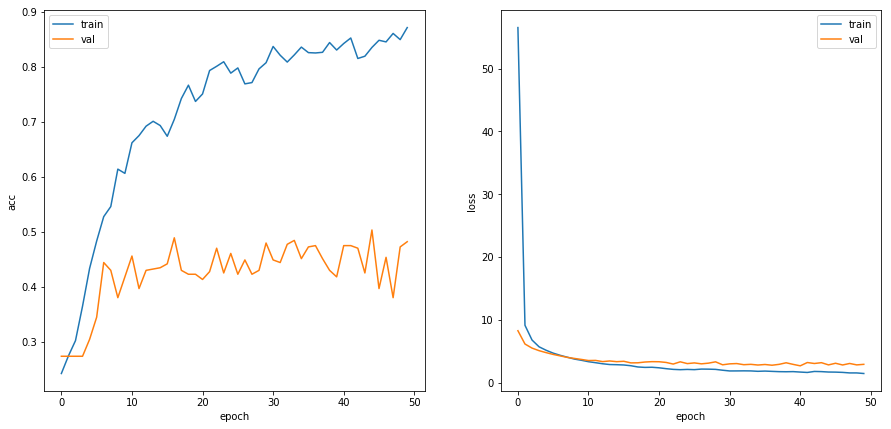

In [71]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'][0:50])
plt.plot(hist['val_acc'][0:50])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'][0:50])
plt.plot(hist['val_loss'][0:50])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])